# IMPORT PACKAGE

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
# Model Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Link Sumber Dataset: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data

# DATA SELECTION

In [39]:
df_bank = pd.read_csv('bank-additional-full.csv', sep=';')

In [40]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
df_bank.shape

(41188, 21)

In [42]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# DATA PREPROCESSING

In [43]:
# Check for missing values
df_bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# EXPLORATORY DATA ANALYSIS

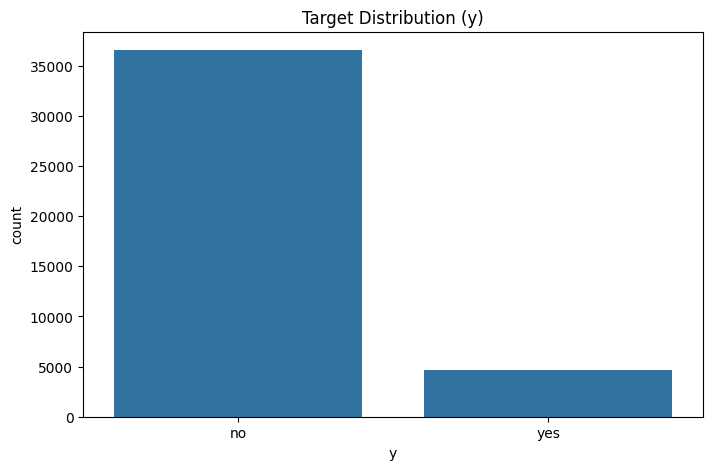

In [44]:
# 1 View target distribution (y)
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=df_bank)
plt.title('Target Distribution (y)')
plt.show()

In [45]:
# 2. View the distribution of all data types
display(df_bank.describe(include='all'))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


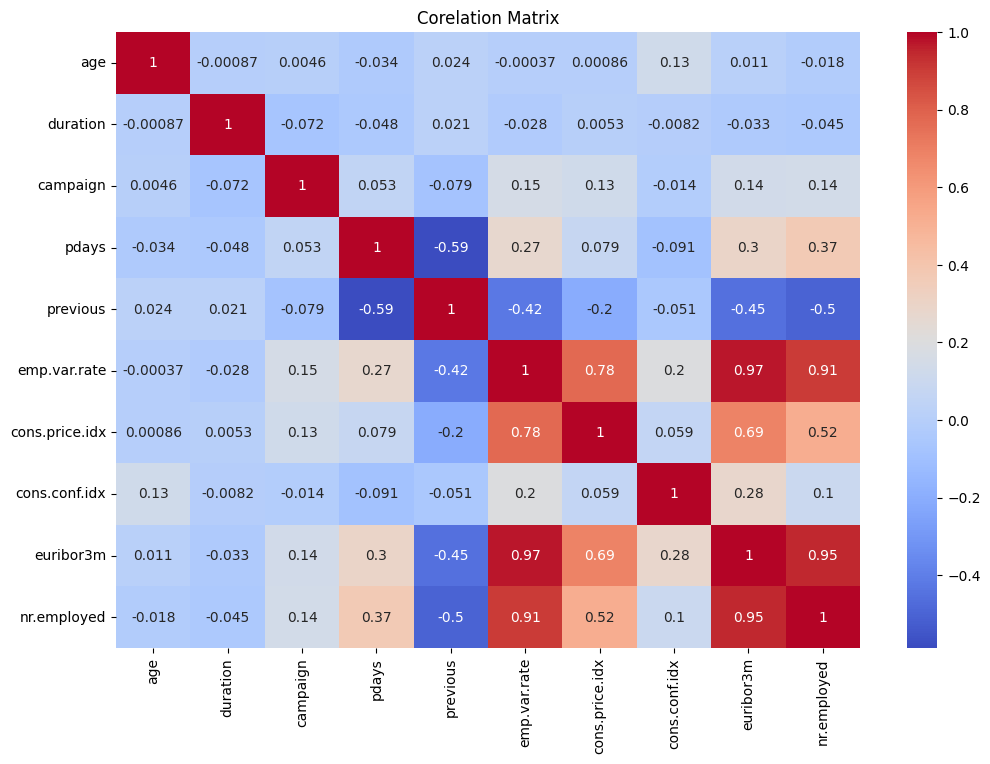

In [46]:
# 3. Corelation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_bank.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Corelation Matrix')
plt.show()

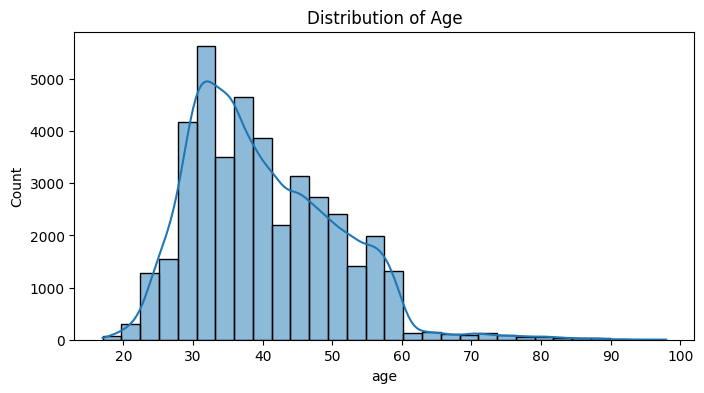

In [47]:
# 4. Show distribution of age
plt.figure(figsize=(8,4))
sns.histplot(df_bank['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

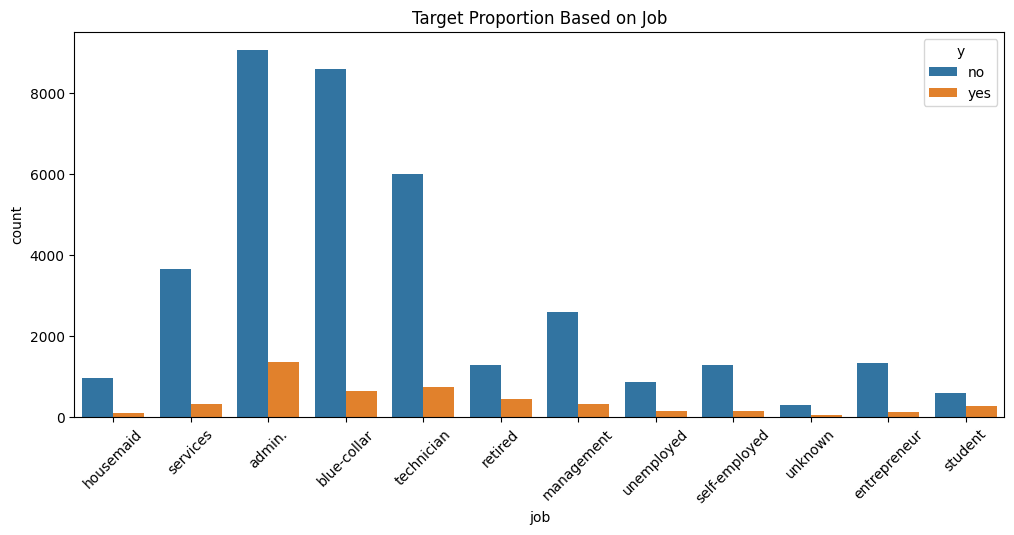

In [48]:
# 5. Show proportion of target based on job
plt.figure(figsize=(12,5))
sns.countplot(x='job', hue='y', data=df_bank)
plt.title('Target Proportion Based on Job')
plt.xticks(rotation=45)
plt.show()

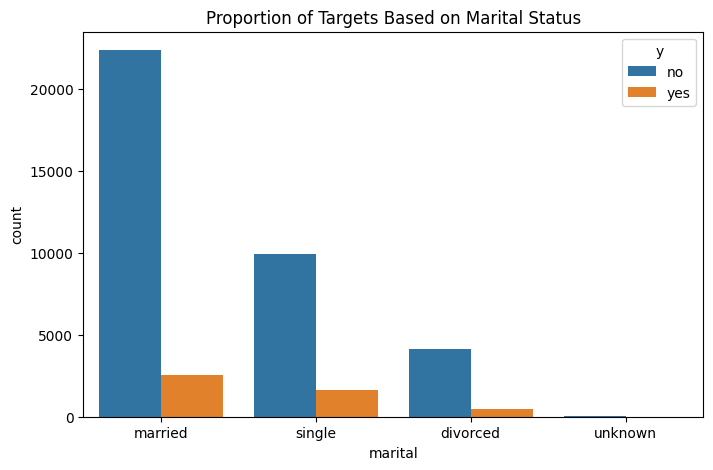

In [49]:
# 6. Show proportion of target based on marital status
plt.figure(figsize=(8,5))
sns.countplot(x='marital', hue='y', data=df_bank)
plt.title('Proportion of Targets Based on Marital Status')
plt.show()

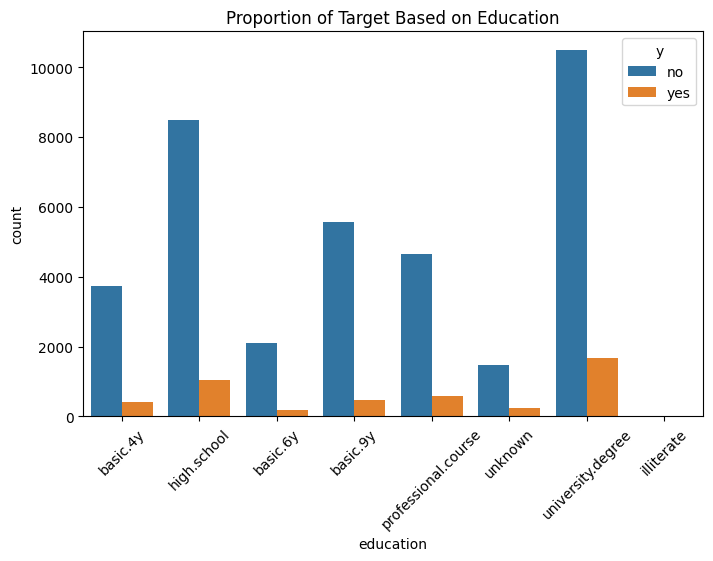

In [50]:
# 7. Show proportion of target based on education
plt.figure(figsize=(8,5))
sns.countplot(x='education', hue='y', data=df_bank)
plt.title('Proportion of Target Based on Education')
plt.xticks(rotation=45)
plt.show()

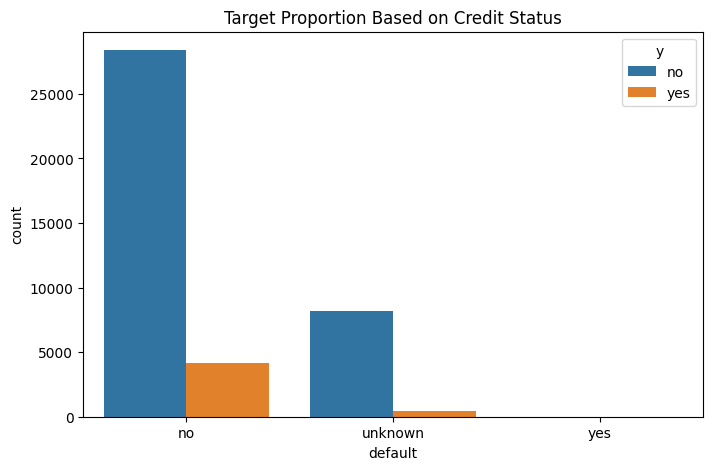

In [51]:
# 8. Show proportion of target based on credit status
plt.figure(figsize=(8,5))
sns.countplot(x='default', hue='y', data=df_bank)
plt.title('Target Proportion Based on Credit Status')
plt.show()

# DATA TRANSFORMATION

In [52]:
df_bank = df_bank.drop(columns=['duration'])

In [53]:
df_bank['y'] == 'unknown'

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Name: y, Length: 41188, dtype: bool

In [54]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
# Age group
df_bank['age_group'] = pd.cut(df_bank['age'], bins=[17,25,40,60,100], labels=['young_adult','adult','middle_age','senior'])
# Total contacts
df_bank['total_contacts'] = df_bank['campaign'] + df_bank['previous']
# Contacted before
df_bank['contacted_before'] = np.where(df_bank['pdays']==999, 0, 1)
# Contact frequency
df_bank['contact_frequency'] = df_bank['total_contacts'] / (df_bank['campaign'].replace(0,1))
# Recently contacted
df_bank['recently_contacted'] = np.where(df_bank['pdays']<30, 1, 0)
# Has any loan
df_bank['has_any_loan'] = np.where((df_bank['housing']=='yes') | (df_bank['loan']=='yes'), 1, 0)
# Education level simplification
education_map = {
    'illiterate':'low', 'basic.4y':'low', 'basic.6y':'low', 'basic.9y':'low',
    'high.school':'mid', 'professional.course':'mid',
    'university.degree':'high', 'unknown':'unknown'
}
df_bank['education_level'] = df_bank['education'].map(education_map)
# Contact time
df_bank['contact_time'] = df_bank['month'] + '_' + df_bank['day_of_week']
# Economic situation score (example: simple sum after normalization)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
econ_features = ['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
df_bank[econ_features] = scaler.fit_transform(df_bank[econ_features])
df_bank['econ_score'] = df_bank[econ_features].sum(axis=1)

In [56]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,y,age_group,total_contacts,contacted_before,contact_frequency,recently_contacted,has_any_loan,education_level,contact_time,econ_score
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,no,middle_age,1,0,1.0,0,0,low,may_mon,4.055878
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,no,middle_age,1,0,1.0,0,0,mid,may_mon,4.055878
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,no,adult,1,0,1.0,0,1,mid,may_mon,4.055878
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,no,adult,1,0,1.0,0,0,low,may_mon,4.055878
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,no,middle_age,1,0,1.0,0,1,mid,may_mon,4.055878


In [57]:
le = LabelEncoder()
# Encode categorical features
categorical_cols = df_bank.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_bank[col] = le.fit_transform(df_bank[col])

In [58]:
# Age Group Category with Numerical Values
age_group_map = {
    'young_adult': 1,
    'adult': 2,
    'middle_age': 3,
    'senior': 4
}
df_bank['age_group'] = df_bank['age_group'].map(age_group_map)

In [59]:
df_bank = df_bank.dropna()

In [60]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,y,age_group,total_contacts,contacted_before,contact_frequency,recently_contacted,has_any_loan,education_level,contact_time,econ_score
0,56,3,1,0,0,0,0,1,6,1,...,0,3,1,0,1.0,0,0,1,31,4.055878
1,57,7,1,3,1,0,0,1,6,1,...,0,3,1,0,1.0,0,0,2,31,4.055878
2,37,7,1,3,0,2,0,1,6,1,...,0,2,1,0,1.0,0,1,2,31,4.055878
3,40,0,1,1,0,0,0,1,6,1,...,0,2,1,0,1.0,0,0,1,31,4.055878
4,56,7,1,3,0,0,2,1,6,1,...,0,3,1,0,1.0,0,1,2,31,4.055878


In [61]:
MnMx = MinMaxScaler()
# Normalize numerical features
numerical_cols = df_bank.select_dtypes(include=['int64', 'float64']).columns
df_bank[numerical_cols] = MnMx.fit_transform(df_bank[numerical_cols])

In [62]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,y,age_group,total_contacts,contacted_before,contact_frequency,recently_contacted,has_any_loan,education_level,contact_time,econ_score
0,0.4750,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,...,0.0,3,0.0,0.0,0.0,0.0,0.0,0.333333,0.632653,0.93955
1,0.4875,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,...,0.0,3,0.0,0.0,0.0,0.0,0.0,0.666667,0.632653,0.93955
2,0.2375,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,...,0.0,2,0.0,0.0,0.0,0.0,1.0,0.666667,0.632653,0.93955
3,0.2750,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,...,0.0,2,0.0,0.0,0.0,0.0,0.0,0.333333,0.632653,0.93955
4,0.4750,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,...,0.0,3,0.0,0.0,0.0,0.0,1.0,0.666667,0.632653,0.93955


In [63]:
if 'age_group' in df_bank.columns and str(df_bank['age_group'].dtype) == 'category':
    df_bank['age_group'] = df_bank['age_group'].cat.codes

In [64]:
X = df_bank.drop(columns=['y'])
y = df_bank['y']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# DATA MINING (CREATE MODELS)

In [66]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:30:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


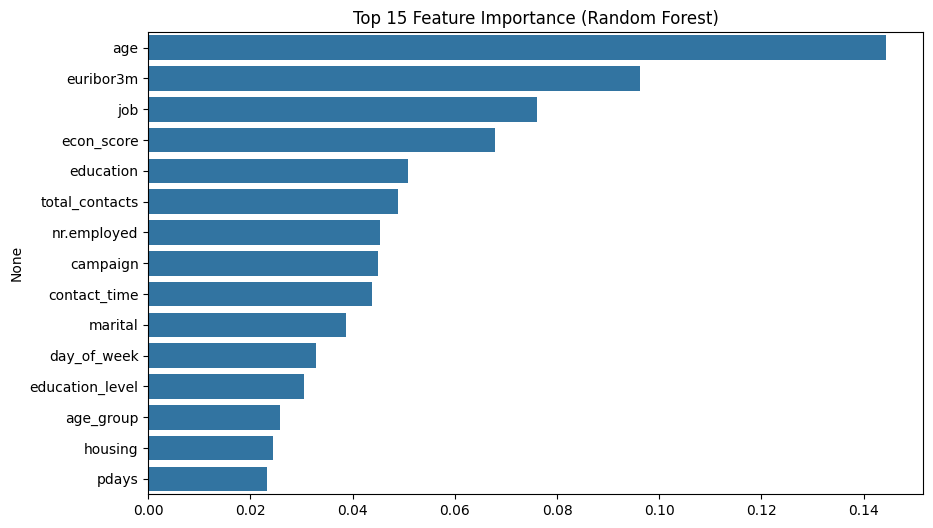

In [67]:
feature_importances = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "feature_importances_"):
        # Tree-based models
        importances = model.feature_importances_
        feature_importances[name] = pd.Series(importances, index=X_train.columns)
    elif hasattr(model, "coef_"):
        # Linear models
        importances = np.abs(model.coef_[0])
        feature_importances[name] = pd.Series(importances, index=X_train.columns)
    else:
        # Model does not support feature importance
        feature_importances[name] = None

# Contoh visualisasi untuk Random Forest
if feature_importances['Random Forest'] is not None:
    feat_imp = feature_importances['Random Forest'].sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
    plt.title('Top 15 Feature Importance (Random Forest)')
    plt.show()

In [68]:
# Best model selection based on accuracy
best_model = None
best_accuracy = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
print(f"Best Model: {best_model.__class__.__name__} with Accuracy: {best_accuracy:.4f}")

Logistic Regression Accuracy: 0.9007
Random Forest Accuracy: 0.8927
SVC Accuracy: 0.9003
KNN Accuracy: 0.8951
Decision Tree Accuracy: 0.8430
Naive Bayes Accuracy: 0.8435
LDA Accuracy: 0.8920
Gradient Boosting Accuracy: 0.9023


C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:36:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8972
Best Model: GradientBoostingClassifier with Accuracy: 0.9023


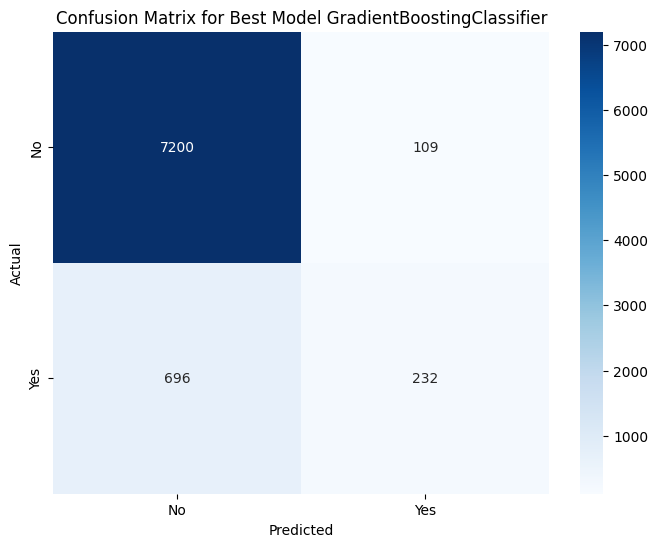

              precision    recall  f1-score   support

          No       0.91      0.99      0.95      7309
         Yes       0.68      0.25      0.37       928

    accuracy                           0.90      8237
   macro avg       0.80      0.62      0.66      8237
weighted avg       0.89      0.90      0.88      8237



In [69]:
# heat map Confusion Matrix and Classification Report
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f'Confusion Matrix for Best Model {best_model.__class__.__name__}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:42:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


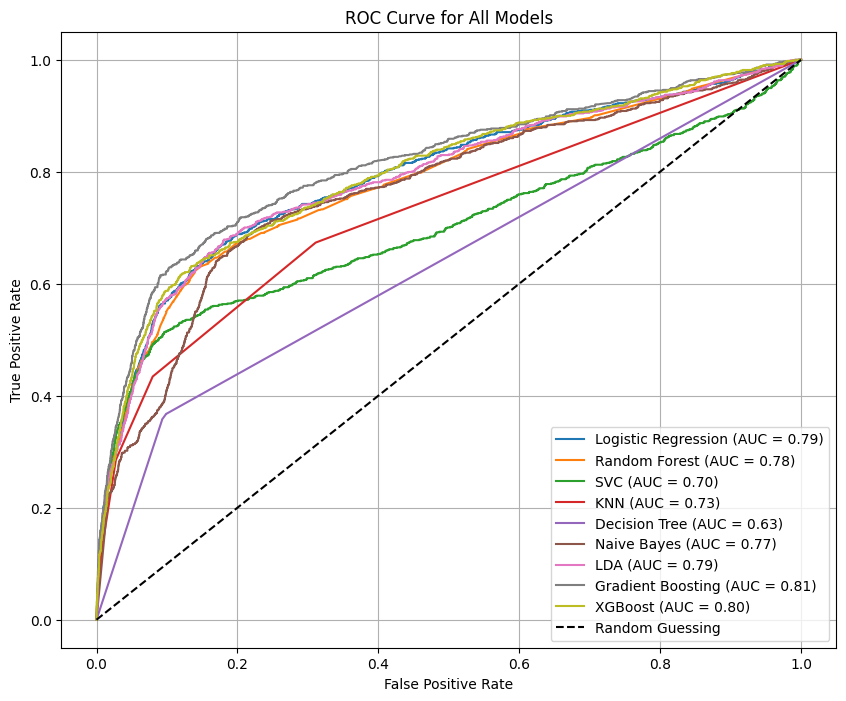

In [70]:
# ROC Curve for all models
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.title('ROC Curve for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()